In [1]:
# Importing libraries

import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
# Dataset

(train_image, train_label), (test_image, test_label) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
# Checking the data

train_image.shape, test_image.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
# Normalizing our image for CNN Model

train_image = train_image.reshape(train_image.shape[0], 28, 28, 1)
test_image = test_image.reshape(test_image.shape[0], 28, 28, 1)

train_image = train_image.astype('float32')
test_image = test_image.astype('float32')

train_image = train_image /255
test_image = test_image /255

In [18]:
# CNN Model

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
                                    tf.keras.layers.MaxPooling2D((2,2), strides=2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D((2,2), strides=2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D((2,2), strides=2),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(200, activation='relu'),
                                    tf.keras.layers.Dense(100, activation='relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 3, 3, 64)          18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 1, 1, 64)         

In [19]:
# Compilin ad training the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_image, train_label, batch_size=100, epochs=25, validation_data=(test_image, test_label))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 4s 60us/sample - loss: 1.5449 - accuracy: 0.3841 - val_loss: 1.0429 - val_accuracy: 0.6179
Epoch 2/25
60000/60000 [==============================] - 3s 43us/sample - loss: 1.1377 - accuracy: 0.5464 - val_loss: 0.9591 - val_accuracy: 0.6130
Epoch 3/25
60000/60000 [==============================] - 3s 43us/sample - loss: 1.0608 - accuracy: 0.5803 - val_loss: 1.0251 - val_accuracy: 0.5514
Epoch 4/25
60000/60000 [==============================] - 3s 46us/sample - loss: 1.0164 - accuracy: 0.6012 - val_loss: 1.0231 - val_accuracy: 0.5729
Epoch 5/25
60000/60000 [==============================] - 3s 44us/sample - loss: 0.9698 - accuracy: 0.6224 - val_loss: 1.0059 - val_accuracy: 0.5789
Epoch 6/25
60000/60000 [==============================] - 3s 43us/sample - loss: 0.9372 - accuracy: 0.6398 - val_loss: 1.0675 - val_accuracy: 0.5576
Epoch 7/25
60000/60000 [==============================] 

KeyboardInterrupt: 

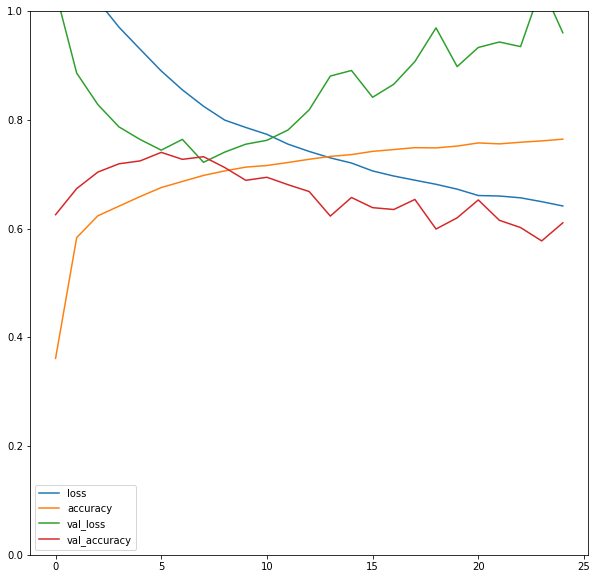

In [16]:
# Plotting graph

import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(10, 10))
plt.grid=True
plt.gca().set_ylim(0,1)
plt.show()